In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
data_dir = Path("datasets")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:

# Heart: predict target
# file_path = data_dir / 'heart' / 'heart.csv'
# heart = pd.read_csv(file_path)
heart = pd.read_csv('heart/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Q: what are you trying to predict? 
A: probability between 0 and 1 describing how confident the model is in predicting whether or not a patient has a heart disease.


Q: What data is available for that (input)?
A dataset with 303 samples, 13 features. 


Q: What can be the motivation and applications for solving the problem?
Such model can help doctors to decide which patient is more likely to have a heart disease, and give high priority for medicat care for patients in "high risk".  

In [3]:
heart.describe(include= "all" )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Q: How many examples are in the dataset? 

A: 303

Q: How many features are in the dataset?

A: 13

In [4]:
heart['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

Q: What is the distribution of the labels?

A: 54.4% - Negative. 45.5% Positive.

from the "heart-disease.names" file we can get the column values

- **age**,
- **sex**,
- **cp**, chest pain type (4 values)
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar > 120 mg/dl
- **restecg**, resting electrocardiographic results (values 0,1,2)
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **target**, 0=no HR 1 = yes HR


There was a mistake in the names of some COLUMES, which we corrected 

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing values in the data, but we need also to look after invalid values, which represent missing data. if there is a missing data we can choose from tow approaches:

1. Delete the missing values.
2. Imputing missing values by using methods such as average of that column 
3. Using OLS regression to estimate the value that is missing, using a correlated column value (like the height to estimate the weight of an individual)

In [7]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
heart['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [9]:
heart['sex'].unique()

array([1, 0])

In [10]:
heart['cp'].unique()

array([3, 2, 1, 0])

In [11]:
heart['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [12]:
heart['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [13]:
heart['fbs'].unique()

array([1, 0])

In [14]:
heart['restecg'].unique()

array([0, 1, 2])

In [15]:
heart['exang'].unique()

array([0, 1])

In [16]:
heart['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [17]:
heart['slope'].unique()

array([0, 2, 1])

In [18]:
heart['ca'].unique()

array([0, 2, 1, 3, 4])

In [19]:
heart['thal'].unique()

array([1, 2, 3, 0])

In [20]:
heart['target'].unique()

array([1, 0])

Q: Are there any missing values?

A: To pinpoint any missing data, we used the "dtypes" and "unique" functions.
We have verified that the data does not contain any missing values.

<AxesSubplot:xlabel='age'>

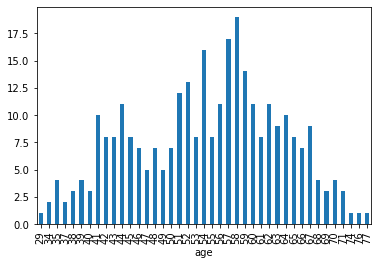

In [21]:
# Show 2-3 graphs describing various aspects of the data.

heart.groupby('age')['age'].count().plot.bar()

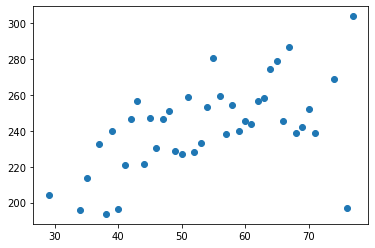

In [22]:
temp_df = heart.groupby('age')['chol'].mean().reset_index(name='chol')
plt.scatter(temp_df['age'], temp_df['chol'])

<AxesSubplot:>

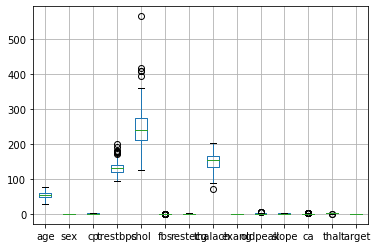

In [23]:
heart.boxplot()

### spliting the data

Here we split the data to feature columns and target column.

In [24]:
X = heart.drop('target', axis=1).copy()

In [25]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y = heart['target'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## In-depth look at our  Independent Variables:

- **age**, **Float**


- **sex** - **Category**


    - 0 = female
    - 1 = male
  
  
- **cp**, chest pain, **Category**
    - 1 = typical angina
    - 2 = atypical angina
    - 3 = non-anginal pain
    - 4 = asymptomatic
  
- **restbp**, resting blood pressure (in mm Hg), **Float**


- **chol**, serum cholesterol in mg/dl, **Float**


- **fbs**, fasting blood sugar, **Category**


    - 0 = >=120 mg/dl
    - 1 = <120 mg/dl
  
- **restecg**, resting electrocardiographic results, **Category**

    - 1 = normal
    - 2 = having ST-T wave abnormality
    - 3 = showing probable or definite left ventricular hypertrophy
  
  
- **thalach**,  maximum heart rate achieved, **Float**


- **exang**, exercise induced angina, **Category**


    - 0 = no
    - 1 = yes
  
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**


- **slope**, the slope of the peak exercise ST segment, **Category**


    - 1 = upsloping
    - 2 = flat
    - 3 = downsloping
  
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**


- **thal**, thalium heart scan, **Category**


    - 3 = normal (no cold spots)
    - 6 = fixed defect (cold spots during rest and exercise)
    - 7 = reversible defect (when cold spots only appear during exercise)
  
  
  
  from the "heart-disease.names" file we can get the column values


We will convert categoricat variables: 
1. cp
2. restecg
3. slope 
4. tha

by using One-Hot Encoding.

In [27]:
X_dummy = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_dummy.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


Q: Did you remove any features?
    
A: No.
    
Q: Did you add any features?

A: No, only converitng to one-hot encoding. 


# Training

The problem we are dealing with is a binary classification problem.
"1" stands for heart disease and "0" for healthy.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, random_state=42, test_size=0.2)

Q: How did you split the data for validating your model performance?

A: We split the data to Train and test dataset with the following ratio: 80% - Train. 20% test.


Q: what metric(s) is used to evaluate the performance of an algorithm?

A: The distribution of rhe labels is 54.4% - Negative. 45.5% Positive, which means that the dataset is pretty balanced, which mean that we can simply use Accuracy as an evaluation metric for this problem, f1 score may be used as well.

,model,acc,f1
8,DecisionTreeClassifier(max_depth=15),0.852459,0.857143
10,"(DecisionTreeClassifier(max_depth=3, max_featu...",0.885246,0.892308
11,"(DecisionTreeClassifier(max_depth=7, max_featu...",0.885246,0.892308
12,"(DecisionTreeClassifier(max_depth=13, max_feat...",0.885246,0.892308


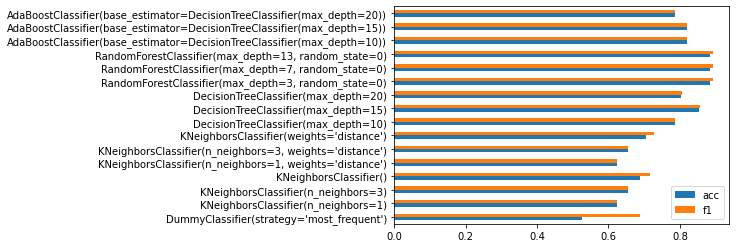

In [70]:
# comapring all model that we should check
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

models = [
    DummyClassifier(strategy='most_frequent'),
    KNeighborsClassifier(n_neighbors=1, weights='uniform'),
    KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    KNeighborsClassifier(n_neighbors=1, weights='distance'),
    KNeighborsClassifier(n_neighbors=3, weights='distance'),
    KNeighborsClassifier(n_neighbors=5, weights='distance'),
    DecisionTreeClassifier(max_depth=10),
    DecisionTreeClassifier(max_depth=15),
    DecisionTreeClassifier(max_depth=20),
    RandomForestClassifier(max_depth=3, random_state=0),
    RandomForestClassifier(max_depth=7, random_state=0),
    RandomForestClassifier(max_depth=13, random_state=0),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10)),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15)),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20)),
]

def train_eval_model(model, dataset):
    X_train, X_test, y_train, y_test = dataset
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    return acc, f1
    
accs = []
f1s = []
for model in models:
    acc, f1 = train_eval_model(model, (X_train, X_test, y_train, y_test))
    accs.append(acc)
    f1s.append(f1)
    
# Plot results
res_df = pd.DataFrame({'model': models, 'acc':accs, 'f1': f1s})
f = res_df.plot.barh()
f = plt.yticks(range(len(models)), models)

res_df[res_df['f1'] > 0.85]

Q: What decision trees did you get? 

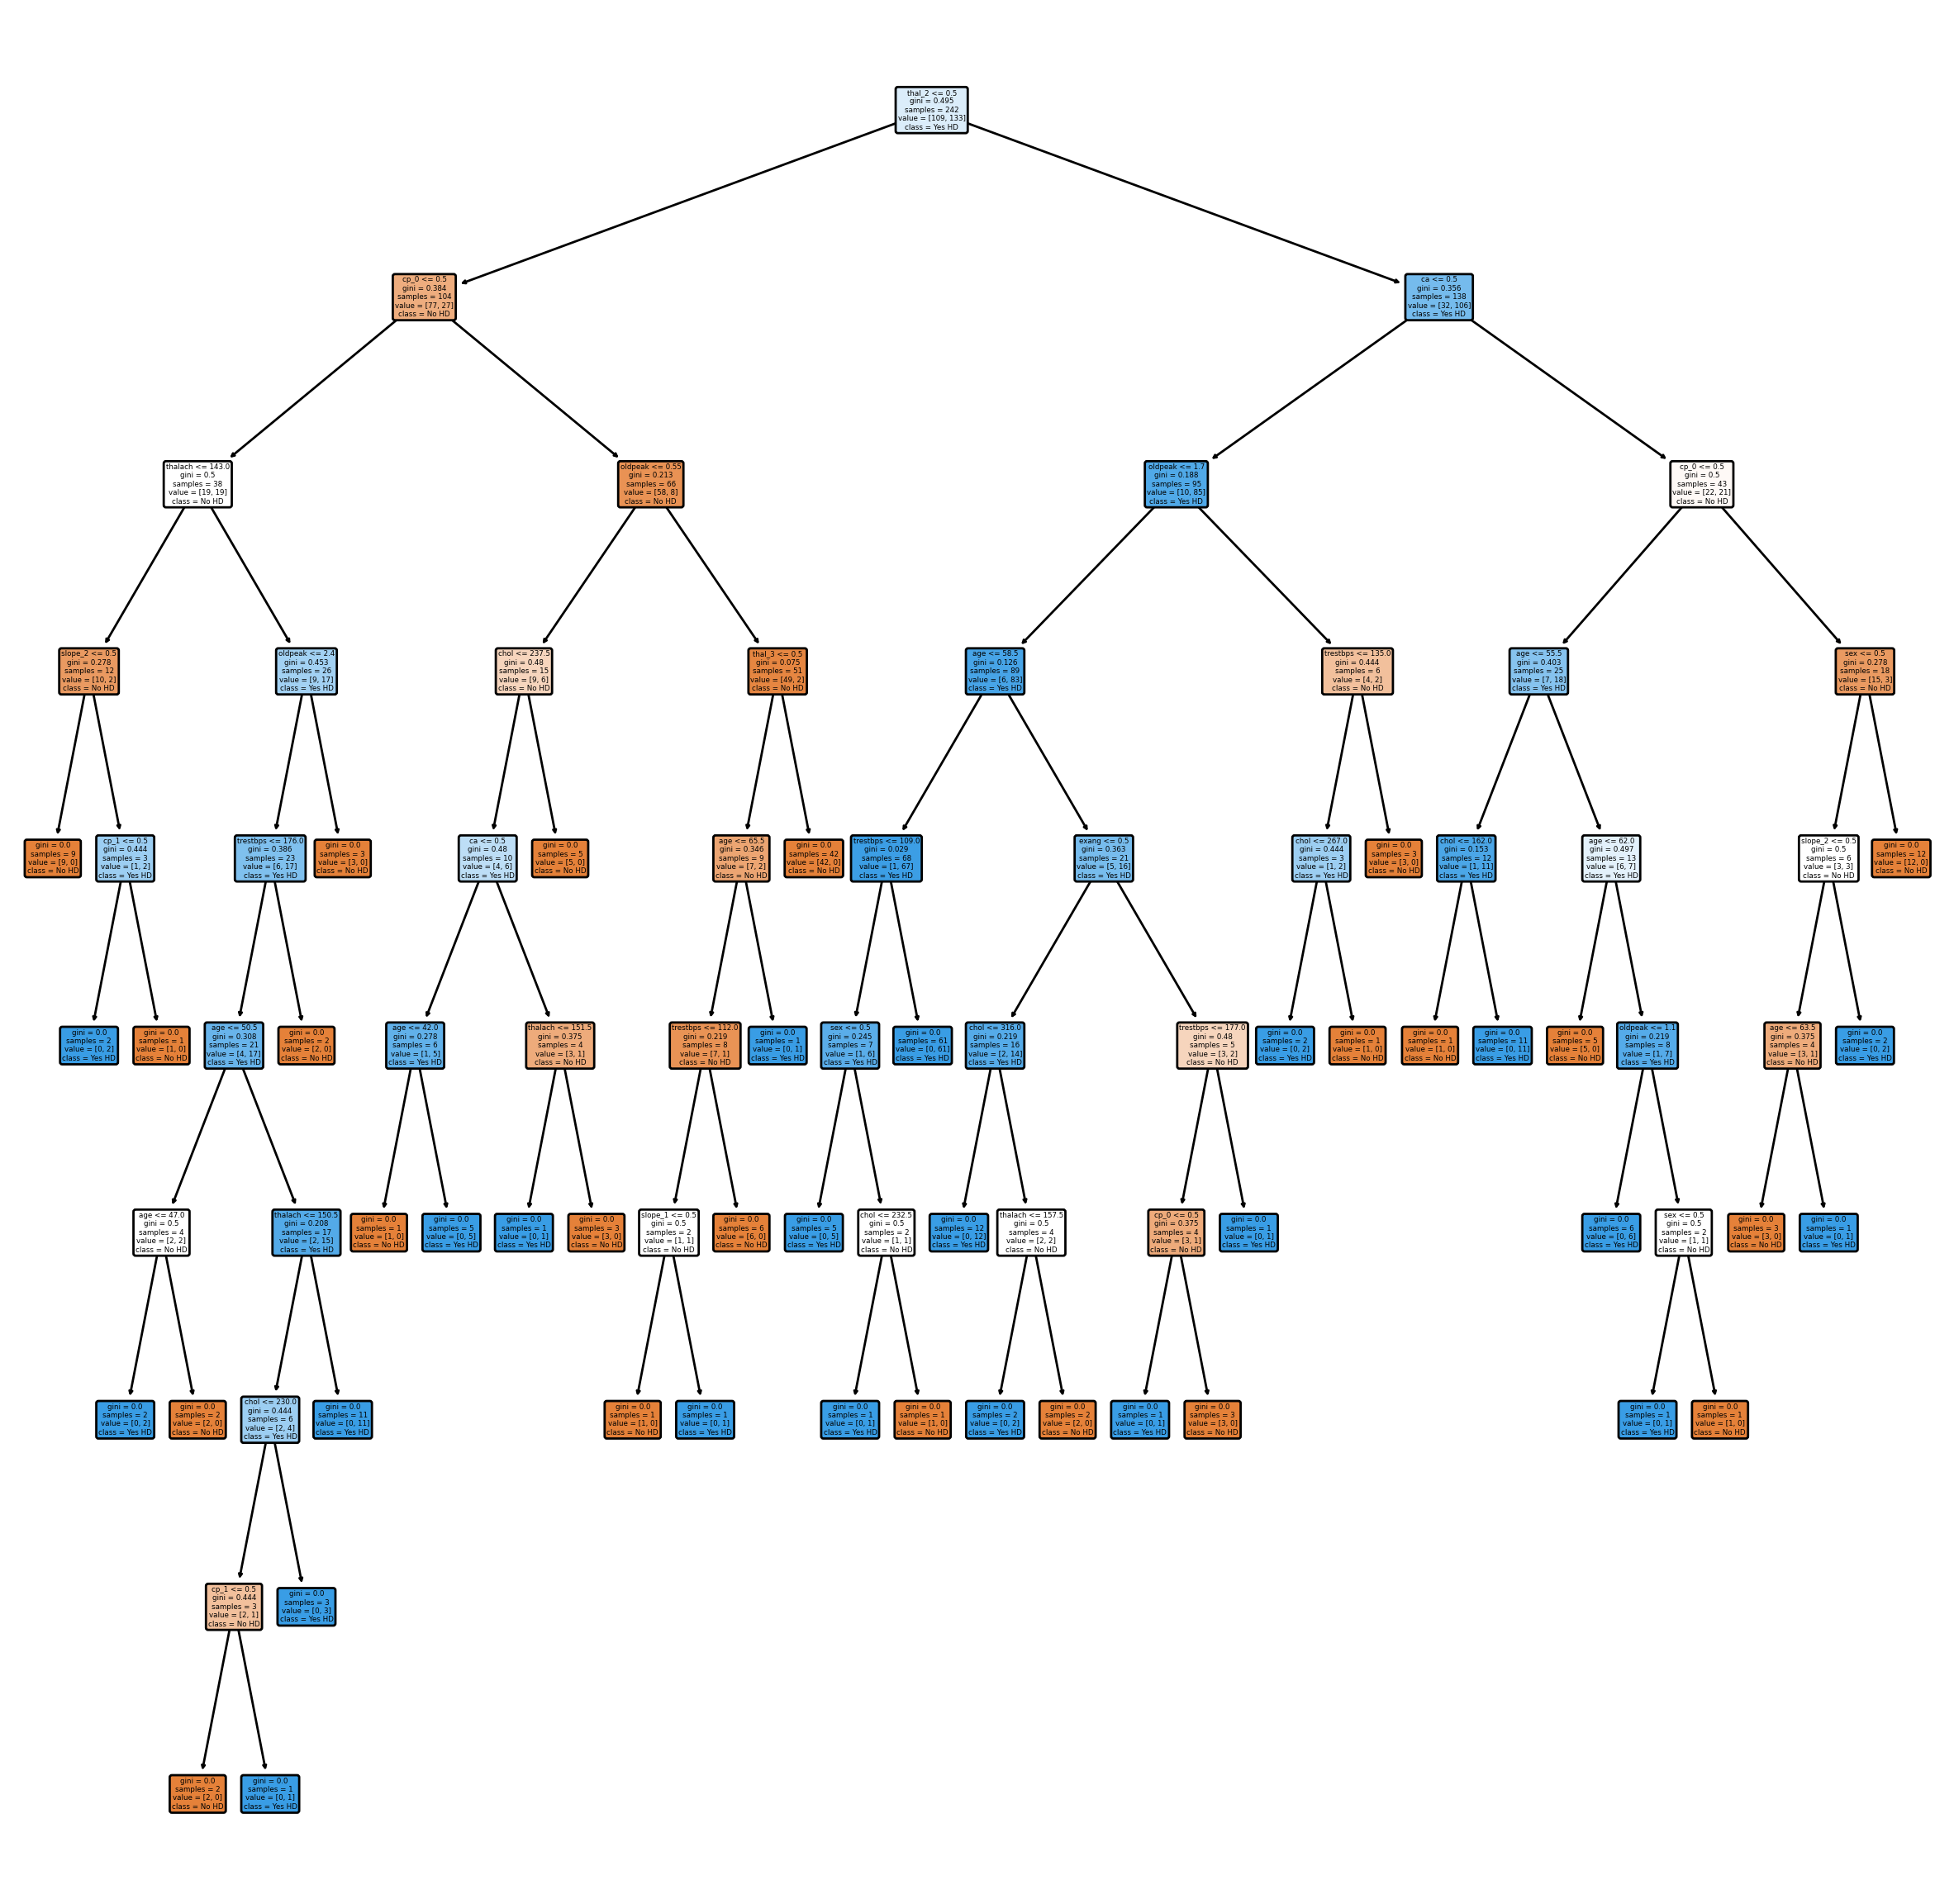

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Thats the best Decision tree that we got:

plt.figure(figsize=(15, 15),  dpi=200)
clf = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)
plot_tree(clf, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_dummy.columns);

Q: What is the random forest feature importance?

Text(0.5, 1.0, 'Feature importances')

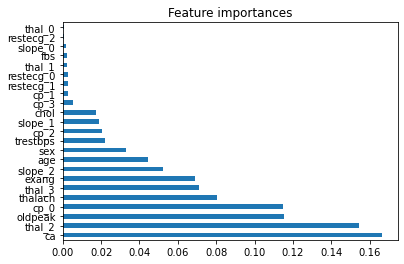

In [45]:
forest = RandomForestClassifier(max_depth=3).fit(X_train, y_train)

importances = forest.feature_importances_

feature_names = list(X_train.columns)
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

forest_importances.plot.barh()
plt.title("Feature importances")

,model,acc,f1
15,"(DecisionTreeClassifier(criterion='entropy', m...",0.901639,0.903226
20,"(DecisionTreeClassifier(criterion='entropy', m...",0.901639,0.903226
0,"(DecisionTreeClassifier(max_depth=2, max_featu...",0.901639,0.903226
28,"(DecisionTreeClassifier(criterion='entropy', m...",0.901639,0.906250


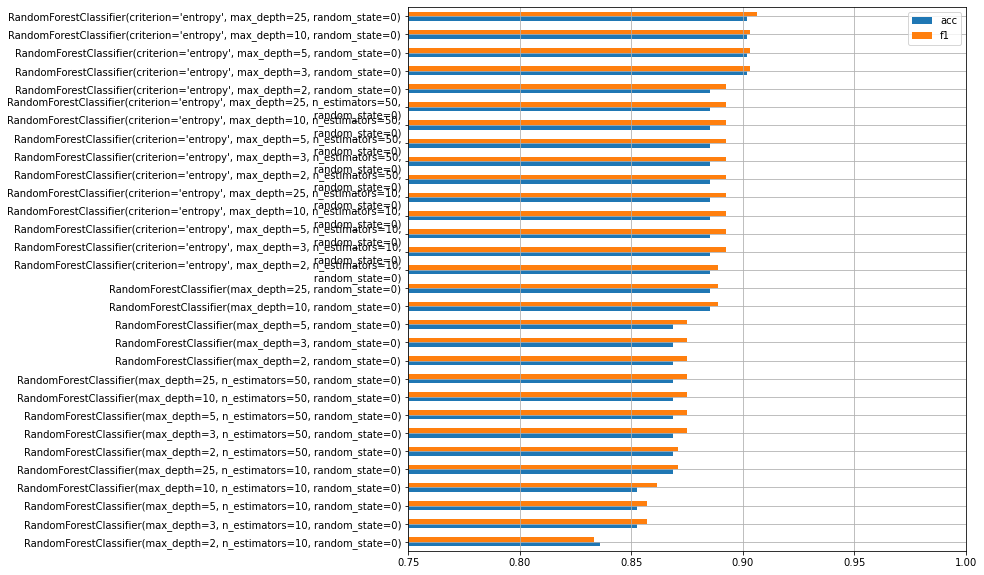

In [68]:
# Random Forest Hyper parameters search

n_estimators_list = [10, 50, 100]
max_depth_list = [2,3,5,10,25]
criterion_list = ['gini', 'entropy']

dataset = (X_train, X_test, y_train, y_test)

models_list = []
accs_list = []
f1s_list = []
for criterion in criterion_list:
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:

            model = RandomForestClassifier(criterion=criterion, max_depth=max_depth, n_estimators=n_estimators, random_state=0)
            acc, f1 = train_eval_model(model, dataset)

            models_list.append(model)
            accs_list.append(acc)
            f1s_list.append(f1)
            
#             print(f'model: {model} - Acc:{acc}, F1: {f1}')

    
# Plot results
# plt.figure(,  dpi=200)
res_df = pd.DataFrame({'model': models_list, 'acc':accs_list, 'f1': f1s_list})
res_df = res_df.sort_values('f1')
f = res_df.plot.barh(figsize=(10, 10))
f = plt.yticks(range(len(models_list)), models_list)
plt.xlim([0.75, 1])
plt.grid()

res_df[res_df['f1'] > 0.9]

Q: Improvement of the algorithm with hyperparameters.
    
A:
At the begining the best Random Forest model had 0.89 Accuracy.
After Hyperparameret tuning we improved the accuracy by 1%. 

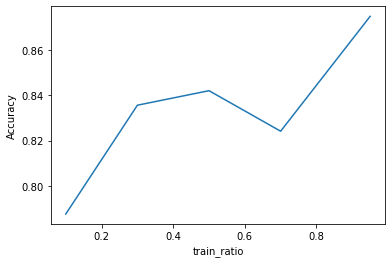

,train_ratio,acc,f1
0,0.10,0.787546,0.801370
1,0.30,0.835681,0.848485
2,0.50,0.842105,0.855422
3,0.70,0.824176,0.840000
4,0.95,0.875000,0.900000


In [80]:
model = RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=100, random_state=0)

train_ratio_list = []
accs_list = []
f1s_list = []
for train_ratio in [0.1, 0.3, 0.5, 0.7, 0.95]:
    test_ratio = 1-train_ratio
    dataset = train_test_split(X_dummy, y, random_state=42, test_size=test_ratio)
    acc, f1 = train_eval_model(model, dataset)
    train_ratio_list.append(train_ratio)
    accs_list.append(acc)
    f1s_list.append(f1)

res_df = pd.DataFrame({'train_ratio': train_ratio_list, 'acc':accs_list, 'f1': f1s_list})
res_df = res_df.sort_values('train_ratio')


plt.plot(train_ratio_list, accs_list)
plt.ylabel('Accuracy')
plt.xlabel('train_ratio')
plt.show()

#     print(f'train ratio: {train_ratio}, size:{len(X_train)}')
res_df

It's imposible to set the train size to 100% because then we will get empty test set.

In [93]:
# combine multiple models:

model1 = RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=100, random_state=0).fit(X_train,y_train)
model2 = DecisionTreeClassifier(max_depth=15, random_state=0).fit(X_train,y_train)
model3 = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X_train,y_train)

y_pred_1 = model1.predict(X_test) # [0, 1, 0, 1...]
y_pred_2 = model2.predict(X_test) # [1, 1, 1, 1...]
y_pred_3 = model3.predict(X_test) # [0, 0, 0, 1...]

final_prediction = []
for p1,p2,p3 in zip(y_pred_1, y_pred_2, y_pred_3):
    if p1+p2+p3 > 1:
        final_prediction.append(1)
    else:
        final_prediction.append(0)
        
acc = accuracy_score(final_prediction, y_test)
print(acc)

0.8524590163934426


A: We see that combining the best model with two other models that are not the best, does not imporove the perfromance of the model. There is a drop of 5% in model Accuracy.